## Importing libraries required for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('netflix daily top 10.csv')

In [4]:
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [5]:
df.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


# Exploratory Data Analysis

In [6]:
df.shape

(7100, 10)

In [7]:
df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 360.6+ KB


In [9]:
df['Netflix Release Date']=pd.to_datetime(df['Netflix Release Date']) #changing the data time format

In [10]:
df.describe(include='object')

,As of,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive
count,7100,7100,7100,7100,7100,4599
unique,710,11,11,645,4,1
top,2020-04-01,-,-,Cocomelon,TV Show,Yes
freq,10,859,3968,428,4446,4599


In [11]:
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [12]:
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

### Handling the duplicate values

In [13]:
sort = df.sort_values(by = "Days In Top 10", ascending=False, na_position="last")
no_duplicate=sort.drop_duplicates(subset="Title")
no_duplicate.shape


(645, 10)

In [14]:
no_duplicate.describe(include='object')

,As of,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive
count,645,645,645,645,645,409
unique,444,11,11,645,4,1
top,2022-03-11,9,-,Cocomelon,Movie,Yes
freq,10,116,365,1,355,409


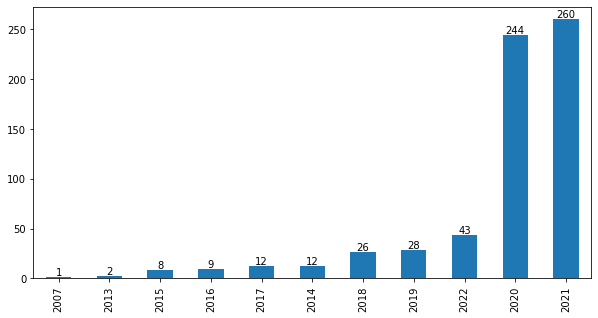

In [18]:
movies_released=no_duplicate['Netflix Release Date'].dt.year.value_counts().sort_values(ascending=True)
plt.figure(figsize=(10,5))
ax=movies_released.plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

**There have been significant rise in contents released in netflix after 2019**

In [19]:
# handling null values
no_duplicate["Netflix Exclusive"].fillna("No", inplace = True)
no_duplicate['Netflix Exclusive'].value_counts()

Yes    409
No     236
Name: Netflix Exclusive, dtype: int64

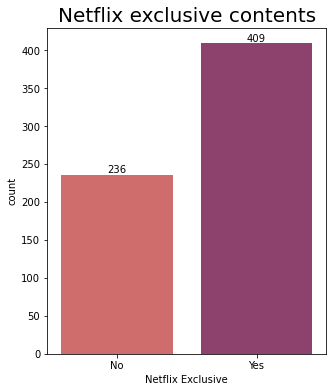

In [20]:
plt.figure(figsize=(5,6))
ax=sns.countplot(x='Netflix Exclusive', data=no_duplicate,palette = "flare")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Netflix exclusive contents',fontsize=20)
plt.show()

**It is clear from the above graph that number of exclusive netflix contents are much more than non exclusive**

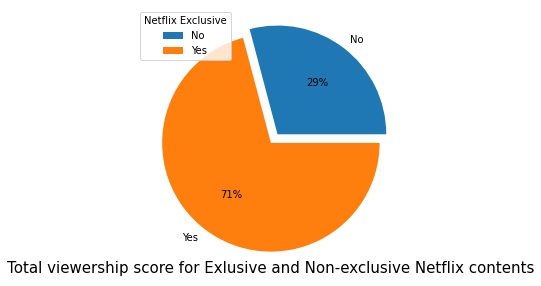

In [22]:
x=no_duplicate.groupby(['Netflix Exclusive'])['Viewership Score'].sum()
plt.figure(figsize=(10,5))
labels=['No','Yes']
explode=(0.1,0)
plt.pie(x,labels=labels, autopct='%.0f%%',explode=explode)
plt.legend(labels,title='Netflix Exclusive')
plt.title('Total viewership score for Exlusive and Non-exclusive Netflix contents',y=0,fontsize=15)
plt.show()

**It is clear from the above pie chart that Overall viewership score for netflix exclusive contents are much greater than non exclusive contents**

In [36]:
count_type=no_duplicate['Type'].value_counts()
count_type

Movie              355
TV Show            283
Stand-Up Comedy      6
Concert/Perfâ¦      1
Name: Type, dtype: int64

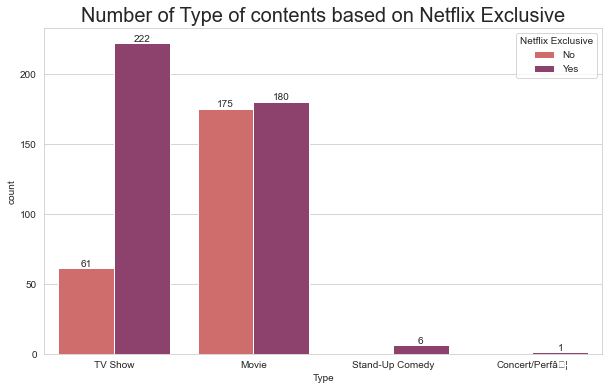

In [56]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax=sns.countplot(x='Type',hue='Netflix Exclusive' ,data=no_duplicate,palette = "flare")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Type of contents based on Netflix Exclusive",fontsize=20)
plt.show()

In [23]:
z=no_duplicate.groupby(['Type'], as_index=False)['Viewership Score'].sum()

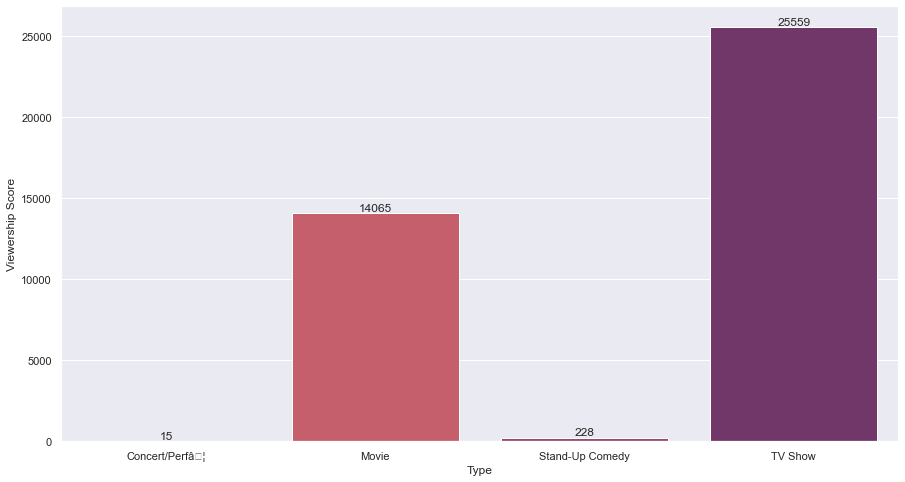

In [22]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.barplot(x='Type',y='Viewership Score',data=z,palette = "flare")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**from the above barplot we can that that viewership of tv shows are significantly higher than the rest of the contents**

In [23]:
no_duplicate

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,No,2020-06-01,428,1474
6996,2022-03-01,7,7,8,Ozark,TV Show,Yes,2017-07-21,89,536
6678,2022-01-28,9,7,5,Cobra Kai,TV Show,No,2020-08-28,81,582
5347,2021-09-17,8,7,6,Manifest,TV Show,No,2021-06-10,80,590
2809,2021-01-06,10,9,6,The Queenâs Gambit,TV Show,Yes,2020-10-23,73,446
...,...,...,...,...,...,...,...,...,...,...
429,2020-05-13,10,-,-,House at the End of the Street,Movie,No,2013-05-08,1,1
6739,2022-02-03,10,-,-,The Lucky One,Movie,No,2022-02-01,1,1
1689,2020-09-16,10,-,-,How to Train Your Dragon 2,Movie,No,2020-09-11,1,1
6673,2022-01-28,4,-,-,Chosen,TV Show,Yes,2022-01-27,1,7


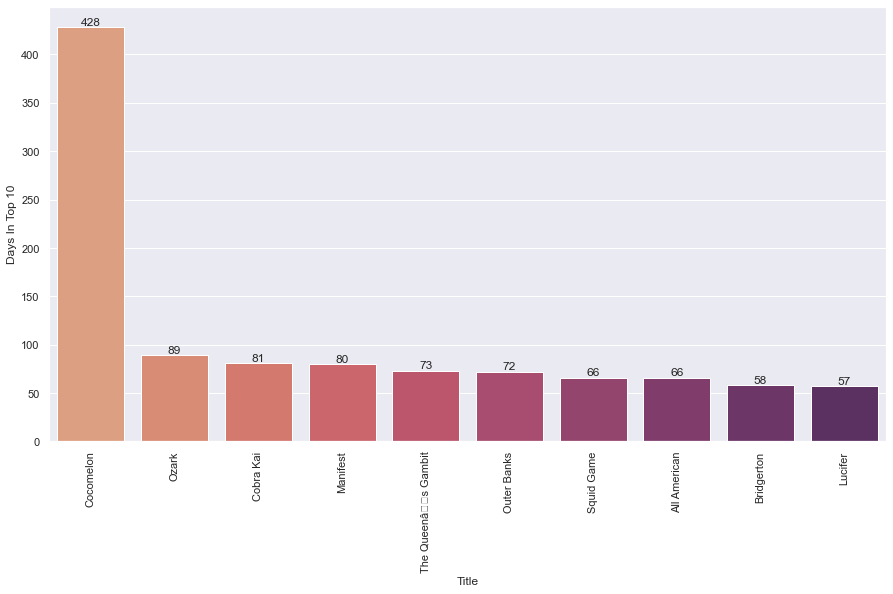

In [41]:

tv=no_duplicate[no_duplicate['Type']=='TV Show']
top_10_tvshows= tv.groupby(['Title'],as_index=False)['Days In Top 10'].max().sort_values(by='Days In Top 10',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.barplot(x='Title',y='Days In Top 10',data=top_10_tvshows,palette = "flare")
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**The above graph shows the top 10 tv shows which were on top 10 ranking for most number of days**

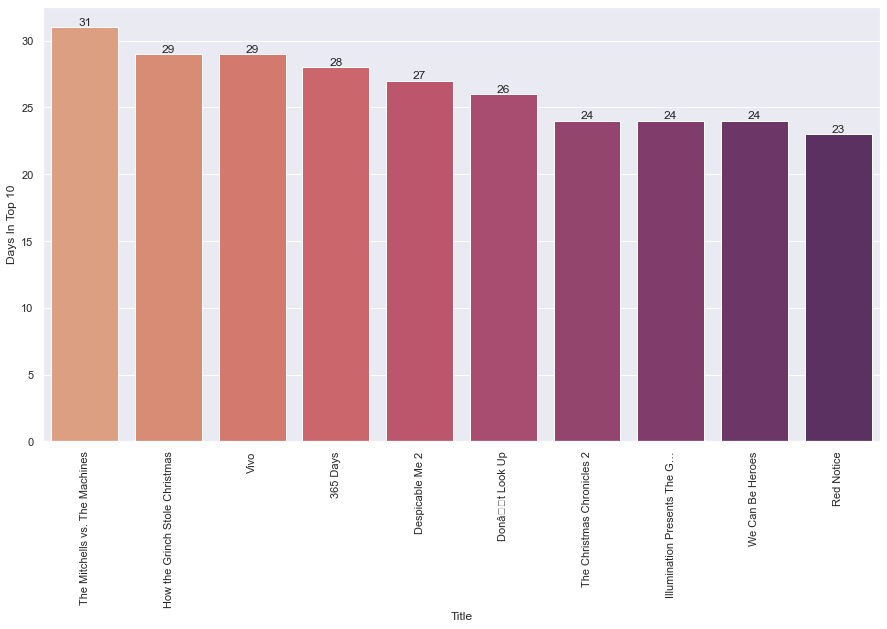

In [42]:
movie=no_duplicate[no_duplicate['Type']=='Movie']
top_10_movie= movie.groupby(['Title'],as_index=False)['Days In Top 10'].max().sort_values(by='Days In Top 10',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.barplot(x='Title',y='Days In Top 10',data=top_10_movie,palette = "flare")
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**The above graph shows the top 10 movies which were on top 10 ranking for most number of days**